コード4-3-1 必要なライブラリの読み込み

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

コード4-3-2 乳がんのデータセットの読み込み

In [ ]:
bc = load_breast_cancer()

コード4-3-3 説明変数（特徴量）の確認

In [ ]:
bc.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

コード4-3-4 目的変数（正解ラベル）の確認

In [ ]:
bc.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

コード4-3-5 正解ラベルの種類

In [ ]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

コード4-3-6 学習用データとテスト用データの分割

In [ ]:
#　前章同様7:3の割合で学習用データを分けます
x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


コード4-3-7 説明変数を先頭3つに修正

In [ ]:
# x_train, x_testの内、行はすべて、列は先頭から3列目までを取り出す
x_train3 = x_train[:,:3]
x_test3 = x_test[:,:3]
print(x_train3.shape)
print(x_test3.shape)

(398, 3)
(171, 3)


コード4-3-8 深層学習モデルの作成

In [ ]:
model = Sequential()
model.add(Dense(2, input_shape=(3, ), activation='relu')) # 中間層を作成
model.add(Dense(1, activation='sigmoid')) # 出力層を作成
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy']) # 学習方法の設定
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 11 (44.00 Byte)
Trainable params: 11 (44.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


(補足) ランダムなパラメーターの値の確認

In [ ]:
# 本文では述べていませんが、(モデル名).layersとすると、各層の重みやバイアスの値を確認することができます
# コード4-8を実行するたびに学習前の重みが変わることが確認できます
# コード4-9以降で本文のような結果が得られない(うまく学習が進まない)ときはコード4-8から何度か実行し直してください
for i in model.layers:
  print(i.weights)

[<tf.Variable 'dense_4/kernel:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.25916475,  0.97335005],
       [-0.03692698,  0.22032595],
       [ 0.2377106 ,  0.83984315]], dtype=float32)>, <tf.Variable 'dense_4/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]
[<tf.Variable 'dense_5/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.78447825],
       [-0.3997612 ]], dtype=float32)>, <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


コード4-3-9 学習の実施

In [ ]:
result = model.fit(x_train3,y_train,batch_size=32,epochs=300)

Epoch 1/300
13/13 [==============================] - 1s 2ms/step - loss: 27.1328 - accuracy: 0.3693
Epoch 2/300
13/13 [==============================] - 0s 2ms/step - loss: 25.3038 - accuracy: 0.3693
Epoch 3/300
13/13 [==============================] - 0s 2ms/step - loss: 23.5756 - accuracy: 0.3693
Epoch 4/300
13/13 [==============================] - 0s 2ms/step - loss: 21.9148 - accuracy: 0.3693
Epoch 5/300
13/13 [==============================] - 0s 2ms/step - loss: 20.2680 - accuracy: 0.3693
Epoch 6/300
13/13 [==============================] - 0s 2ms/step - loss: 18.7044 - accuracy: 0.3693
Epoch 7/300
13/13 [==============================] - 0s 2ms/step - loss: 17.1848 - accuracy: 0.3693
Epoch 8/300
13/13 [==============================] - 0s 2ms/step - loss: 15.7475 - accuracy: 0.3693
Epoch 9/300
13/13 [==============================] - 0s 2ms/step - loss: 14.3428 - accuracy: 0.3693
Epoch 10/300
13/13 [==============================] - 0s 2ms/step - loss: 12.9955 - accuracy: 0.3693

コード4-3-10 result.historyの値の表示

In [ ]:
result.history

{'loss': [27.132789611816406,
  25.30379867553711,
  23.575641632080078,
  21.91482162475586,
  20.267982482910156,
  18.704429626464844,
  17.184799194335938,
  15.74748420715332,
  14.342781066894531,
  12.995477676391602,
  11.783489227294922,
  10.846250534057617,
  10.109687805175781,
  9.446681022644043,
  8.831244468688965,
  8.212919235229492,
  7.628700256347656,
  7.072811603546143,
  6.529147624969482,
  6.012474060058594,
  5.515021800994873,
  5.035747528076172,
  4.568746089935303,
  4.119166374206543,
  3.687025547027588,
  3.2685742378234863,
  2.8716931343078613,
  2.481368064880371,
  2.1200995445251465,
  1.7753561735153198,
  1.4705313444137573,
  1.1996963024139404,
  0.9896437525749207,
  0.8375378251075745,
  0.7393214702606201,
  0.6856867074966431,
  0.6614546775817871,
  0.6510117053985596,
  0.6477799415588379,
  0.646033763885498,
  0.6449910998344421,
  0.6443248391151428,
  0.6432710289955139,
  0.6414462924003601,
  0.6382783651351929,
  0.631555557250976

コード4-3-11 誤差の学習過程の表示

In [ ]:
# ここでは誤差のみ実行していますが正解率でも同様です
result.history['loss']

[27.132789611816406,
 25.30379867553711,
 23.575641632080078,
 21.91482162475586,
 20.267982482910156,
 18.704429626464844,
 17.184799194335938,
 15.74748420715332,
 14.342781066894531,
 12.995477676391602,
 11.783489227294922,
 10.846250534057617,
 10.109687805175781,
 9.446681022644043,
 8.831244468688965,
 8.212919235229492,
 7.628700256347656,
 7.072811603546143,
 6.529147624969482,
 6.012474060058594,
 5.515021800994873,
 5.035747528076172,
 4.568746089935303,
 4.119166374206543,
 3.687025547027588,
 3.2685742378234863,
 2.8716931343078613,
 2.481368064880371,
 2.1200995445251465,
 1.7753561735153198,
 1.4705313444137573,
 1.1996963024139404,
 0.9896437525749207,
 0.8375378251075745,
 0.7393214702606201,
 0.6856867074966431,
 0.6614546775817871,
 0.6510117053985596,
 0.6477799415588379,
 0.646033763885498,
 0.6449910998344421,
 0.6443248391151428,
 0.6432710289955139,
 0.6414462924003601,
 0.6382783651351929,
 0.6315555572509766,
 0.6219620704650879,
 0.6118160486221313,
 0.603474

コード4-3-12 学習過程の図示

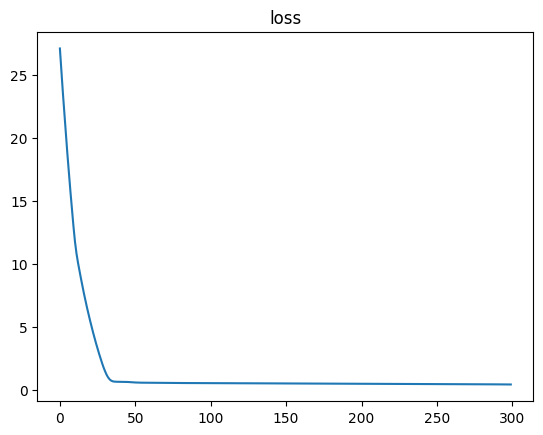

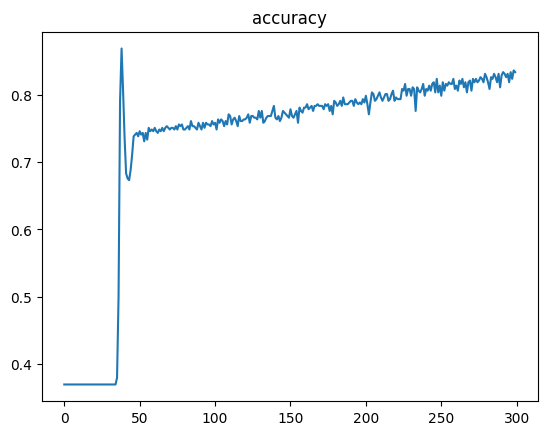

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss']) # 誤差のデータをプロット
plt.title('loss')
plt.show()
plt.plot(result.history['accuracy']) # 正解率のデータをプロット
plt.title('accuracy')
plt.show()

コード4-3-13 テスト用データでのモデルの評価

In [ ]:
evaluate_loss, evaluate_accuracy = model.evaluate(x_test3, y_test)
print(evaluate_loss)
print(evaluate_accuracy)

6/6 [==============================] - 0s 5ms/step - loss: 0.4682 - accuracy: 0.8070
0.46817949414253235
0.8070175647735596


コード4-4-1 説明変数を10個に変更

In [ ]:
x_train10 = x_train[:, :10]
x_test10 = x_test[:, :10]
print(x_train10.shape)
print(x_test10.shape)

(398, 10)
(171, 10)


コード4-4-2 中間層2層、ニューロン数4つのモデルに変更

In [ ]:
model = Sequential()
model.add(Dense(4, input_shape=(10,), activation='relu'))
model.add(Dense(4,activation='relu')) # 2層目の中間層の指示
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 44        
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 69 (276.00 Byte)
Trainable params: 69 (276.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


コード4-4-3 再度学習の実施

In [ ]:
result = model.fit(x_train10, y_train, batch_size=32, epochs=300)

Epoch 1/300
13/13 [==============================] - 2s 7ms/step - loss: 121.1326 - accuracy: 0.3693
Epoch 2/300
13/13 [==============================] - 0s 3ms/step - loss: 111.9844 - accuracy: 0.3693
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 103.3484 - accuracy: 0.3693
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 95.1827 - accuracy: 0.3693
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 87.8980 - accuracy: 0.3693
Epoch 6/300
13/13 [==============================] - 0s 3ms/step - loss: 80.6362 - accuracy: 0.3693
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 74.4099 - accuracy: 0.3693
Epoch 8/300
13/13 [==============================] - 0s 3ms/step - loss: 68.3197 - accuracy: 0.3693
Epoch 9/300
13/13 [==============================] - 0s 4ms/step - loss: 62.6372 - accuracy: 0.3693
Epoch 10/300
13/13 [==============================] - 0s 3ms/step - loss: 57.4458 - accuracy: 0.3

コード4-4-4 学習過程の図示

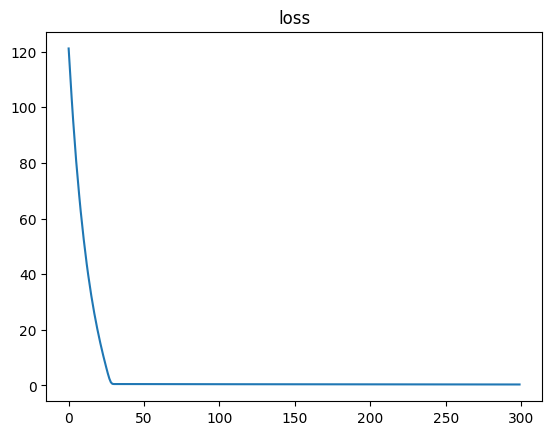

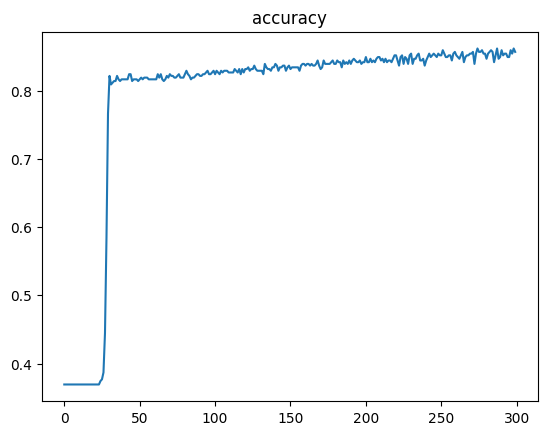

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'])
plt.title('loss')
plt.show()
plt.plot(result.history['accuracy'])
plt.title('accuracy')
plt.show()

コード4-4-5 テスト用データでのモデルの評価

In [ ]:
evaluate_loss, evaluate_accuracy = model.evaluate(x_test10,y_test)
print(evaluate_loss)
print(evaluate_accuracy)

6/6 [==============================] - 0s 5ms/step - loss: 0.4091 - accuracy: 0.8421
0.4091162383556366
0.8421052694320679
